## Heart Failure Prediction
 Group Members: Godwin Karngong, Temitope Adetunji, Franklin Nkokam Ngongang

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings("ignore")

In [8]:
dataset = 'heart_failure_clinical_records_dataset.xls'

In [9]:
import plotly.express as px
import plotly.graph_objs as go

In [10]:
df=pd.read_csv(dataset)

In [11]:
df.head(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [13]:
df.shape

(299, 13)

In [14]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
features=df.columns
for feature in features:
     print(f'{feature}--->{df[feature].nunique()}')

age--->47
anaemia--->2
creatinine_phosphokinase--->208
diabetes--->2
ejection_fraction--->17
high_blood_pressure--->2
platelets--->176
serum_creatinine--->40
serum_sodium--->27
sex--->2
smoking--->2
time--->148
DEATH_EVENT--->2


In [17]:
df.describe().T.sort_values(ascending =0,by='mean').style.background_gradient(cmap='BuGn').bar(subset=['std'], color='red').bar(subset=['mean'], color='blue')

,count,mean,std,min,25%,50%,75%,max
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
time,299.000000,130.260870,77.614208,4.000000,73.000000,115.000000,203.000000,285.000000
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000


In [18]:
df.corr().style.background_gradient(cmap='viridis')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


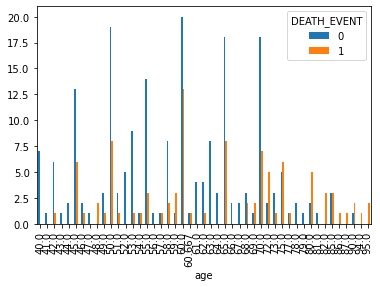

In [19]:
pd.crosstab(df['age'], df['DEATH_EVENT']).plot(kind='bar')

In [20]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

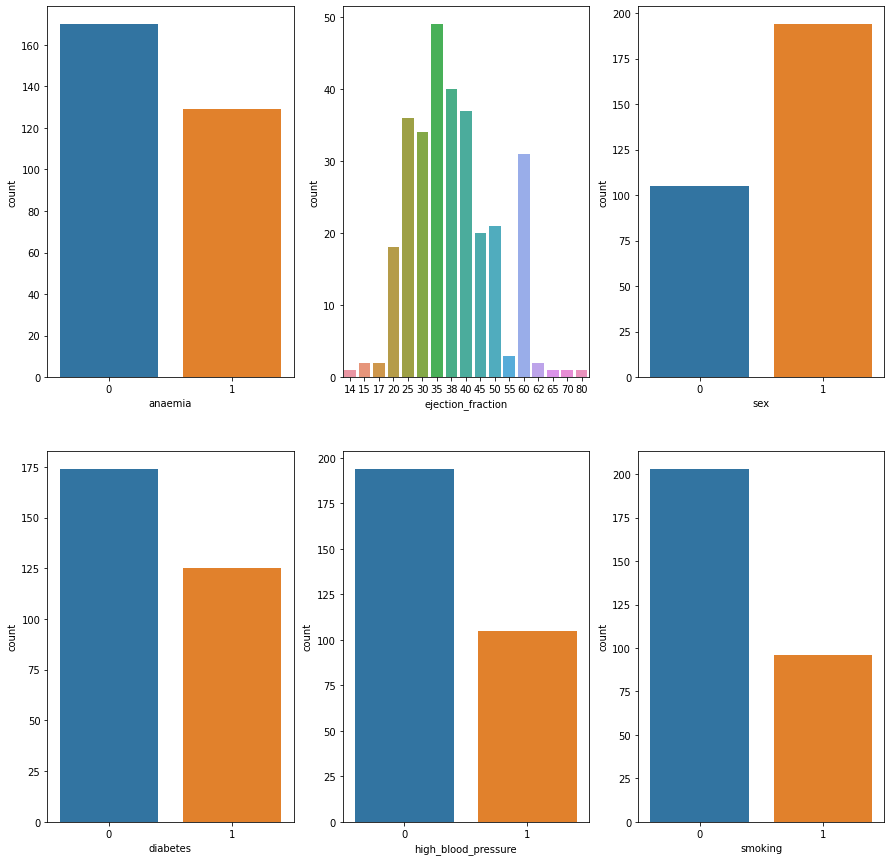

In [21]:
f, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

#fig, axes = plt.subplots((2, 2),figsize=(15, 15))

#create chart in each subplot
#sns.boxplot(data=df, x='age', y='DEATH_EVENT', ax=ax[0,0])
sns.countplot(x='anaemia',data=df,  ax=ax[0,0])
#sns.countplot(x='creatinine_phosphokinase',data=df,  ax=ax[1,0])
sns.countplot(x='diabetes',data=df,  ax=ax[1,0])
sns.countplot(x='ejection_fraction',data=df,  ax=ax[0,1])
sns.countplot(x='high_blood_pressure',data=df,  ax=ax[1,1])
#sns.countplot(x='platelets',data=df,  ax=ax[2,1])
#sns.countplot(x='serum_creatinine',data=df,  ax=ax[3,1])
#sns.countplot(x='serum_sodium',data=df,  ax=ax[0,2])
sns.countplot(x='sex',data=df,  ax=ax[0,2])
sns.countplot(x='smoking',data=df,  ax=ax[1,2])
#sns.countplot(x='time',data=df,  ax=ax[3,2])


In [22]:
fig = px.box(df, y="age", x="smoking", color="DEATH_EVENT", points="all",  hover_data=df.columns)
fig.update_layout(title_text="Death depndance on diabetes and smoking")
fig.show()

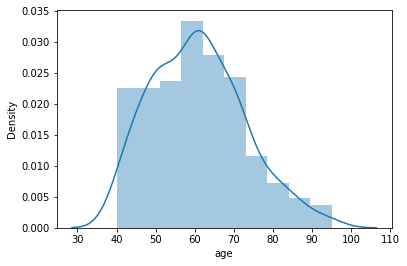

In [23]:
sns.distplot(df['age'])
plt.show()

In [24]:
df.groupby('age')[features].mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,,
40.000,40.000,0.285714,321.142857,0.285714,36.428571,0.142857,262428.571429,0.942857,137.714286,0.714286,0.285714,198.285714,0.000000
41.000,41.000,0.000000,148.000000,0.000000,40.000000,0.000000,374000.000000,0.800000,140.000000,1.000000,1.000000,68.000000,0.000000
42.000,42.000,0.285714,908.142857,0.285714,35.714286,0.000000,244051.147143,1.468571,137.142857,0.714286,0.428571,143.428571,0.142857
43.000,43.000,1.000000,358.000000,0.000000,50.000000,0.000000,237000.000000,1.300000,135.000000,0.000000,0.000000,97.000000,0.000000
44.000,44.000,0.000000,333.000000,1.000000,35.000000,1.000000,249179.015000,1.150000,134.500000,1.000000,0.500000,161.500000,0.000000
45.000,45.000,0.210526,1239.000000,0.578947,39.263158,0.263158,331300.845263,1.024211,137.578947,0.631579,0.157895,156.315789,0.315789
46.000,46.000,0.333333,392.666667,0.333333,30.666667,0.666667,294119.343333,1.393333,133.666667,0.000000,0.000000,105.333333,0.333333
47.000,47.000,0.000000,582.000000,0.000000,25.000000,0.000000,130000.000000,0.800000,134.000000,1.000000,0.000000,201.000000,0.000000
48.000,48.000,1.000000,356.500000,1.000000,42.500000,0.500000,165500.000000,1.750000,125.500000,0.000000,0.000000,104.000000,1.000000


In [25]:
true_anaemia = df[df["sex"]==1]
false_anaemia = df[df["sex"]==0]

true_anaemia_nodeath = true_anaemia[df["DEATH_EVENT"]==0]
true_anaemia_death = true_anaemia[df["DEATH_EVENT"]==1]
false_anaemia_nodeath = false_anaemia[df["DEATH_EVENT"]==0]
false_anaemia_death = false_anaemia[df["DEATH_EVENT"]==1]

labels = ['true_anaemia_nodeath','true_anaemia_death', 'false_anaemia_nodeath', 'false_anaemia_death']
values = [len(true_anaemia[df["DEATH_EVENT"]==0]),len(true_anaemia[df["DEATH_EVENT"]==1]),
         len(false_anaemia[df["DEATH_EVENT"]==0]),len(false_anaemia[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Anaemia analysis")
fig.show()

In [26]:
true_smoking = df[df["sex"]==1]
false_smoking = df[df["sex"]==0]

true_smoking_nodeath = true_smoking[df["DEATH_EVENT"]==0]
true_smoking_death = true_smoking[df["DEATH_EVENT"]==1]
false_smoking_nodeath = false_smoking[df["DEATH_EVENT"]==0]
false_smoking_death = false_smoking[df["DEATH_EVENT"]==1]

labels = ['true_smoking_nodeath','true_smoking_death', 'false_smoking_nodeath', 'false_smoking_death']
values = [len(true_smoking[df["DEATH_EVENT"]==0]),len(true_smoking[df["DEATH_EVENT"]==1]),
         len(false_smoking[df["DEATH_EVENT"]==0]),len(false_smoking[df["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="smoking analysis")
fig.show()

In [27]:
df.time.mean(),df.time.std()

(130.2608695652174, 77.61420795029339)

In [28]:
upperlimit =df.time.mean()+df.time.std()
lowerlimit =df.time.mean()-df.time.std()

In [29]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [30]:
cols_to_scale = ['age',  'creatinine_phosphokinase', 
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [31]:
X=df.drop(['DEATH_EVENT'],axis='columns')
y=df['DEATH_EVENT']

In [32]:
X.shape

(299, 12)

In [33]:
y.shape

(299,)

In [34]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,test_size=0.2,random_state=5)

# Machine learing analysis

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


model_params = {
             
    
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
   'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
        }   
    },
    
       'XGB_Classifier':{
        'model':XGBClassifier(),
        'params':{
            'base_score':[0.5]
            
        }
    } 
        
     
}


In [37]:
from sklearn.model_selection import GridSearchCV
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.836667,{'n_estimators': 5}
1,logistic_regression,0.810000,{'C': 5}
2,svm,0.830000,"{'C': 1, 'kernel': 'linear'}"
3,naive_bayes_gaussian,0.756667,{}
4,naive_bayes_multinomial,0.663333,{}
5,decision_tree,0.803333,{'criterion': 'entropy'}
6,XGB_Classifier,0.840000,{'base_score': 0.5}


In [38]:
model=svm.SVC()
model.fit(X_train, y_train)


SVC()

In [39]:
model.score( X_test, y_test)

0.7926829268292683

In [40]:
y_predicted = model.predict(X_test)

In [41]:
y_predicted[:5]

array([0, 1, 1, 1, 1])

In [42]:
y_test[:5]

284    0
71     0
49     1
335    1
43     0
Name: DEATH_EVENT, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        42
           1       0.77      0.82      0.80        40

    accuracy                           0.79        82
   macro avg       0.79      0.79      0.79        82
weighted avg       0.79      0.79      0.79        82



In [44]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_predicted)
print(f'{mean_squared_error}: {mse}')

<function mean_squared_error at 0x7f6c84b9a3a0>: 0.2073170731707317


Text(69.0, 0.5, 'Truth')

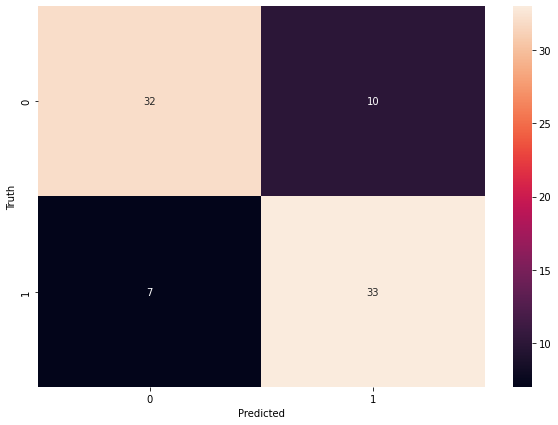

In [45]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Deep learing analysis

In [46]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
mode = keras.Sequential([
    keras.layers.Dense(64, input_dim=12, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),#Dropout Layer
    keras.layers.Dense(1, activation='sigmoid')
])

mode.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history =mode.fit(X_train, y_train, epochs=100,verbose=2 ,batch_size=4)

Epoch 1/100
81/81 - 1s - loss: 0.7115 - accuracy: 0.4938 - 1s/epoch - 15ms/step
Epoch 2/100
81/81 - 0s - loss: 0.7053 - accuracy: 0.5093 - 160ms/epoch - 2ms/step
Epoch 3/100
81/81 - 0s - loss: 0.6941 - accuracy: 0.5340 - 165ms/epoch - 2ms/step
Epoch 4/100
81/81 - 0s - loss: 0.6965 - accuracy: 0.5031 - 165ms/epoch - 2ms/step
Epoch 5/100
81/81 - 0s - loss: 0.6920 - accuracy: 0.5000 - 144ms/epoch - 2ms/step
Epoch 6/100
81/81 - 0s - loss: 0.7096 - accuracy: 0.4815 - 138ms/epoch - 2ms/step
Epoch 7/100
81/81 - 0s - loss: 0.6959 - accuracy: 0.5031 - 158ms/epoch - 2ms/step
Epoch 8/100
81/81 - 0s - loss: 0.6933 - accuracy: 0.5031 - 156ms/epoch - 2ms/step
Epoch 9/100
81/81 - 0s - loss: 0.6768 - accuracy: 0.5679 - 234ms/epoch - 3ms/step
Epoch 10/100
81/81 - 0s - loss: 0.6994 - accuracy: 0.5062 - 296ms/epoch - 4ms/step
Epoch 11/100
81/81 - 0s - loss: 0.6856 - accuracy: 0.5247 - 275ms/epoch - 3ms/step
Epoch 12/100
81/81 - 0s - loss: 0.6898 - accuracy: 0.5525 - 280ms/epoch - 3ms/step
Epoch 13/100
81

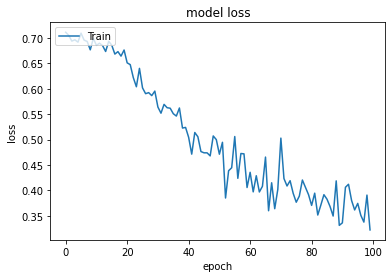

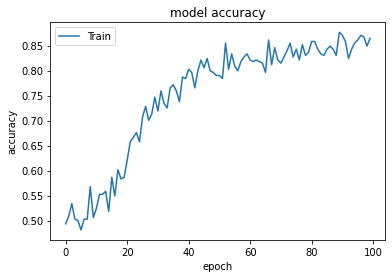

In [47]:
# summarize history for loss
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [48]:
mode.evaluate(X_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.3796 - accuracy: 0.8293


[0.37960779666900635, 0.8292682766914368]

In [49]:
y_predicated=mode.predict(X_test).reshape(-1)


3/3 [==============================] - 0s 4ms/step


In [50]:
y_predicated=np.round(y_predicated)
#y_predicated

In [51]:
print(classification_report(y_test, y_predicated))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        42
           1       0.82      0.82      0.82        40

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82



Text(42.0, 0.5, 'Truth')

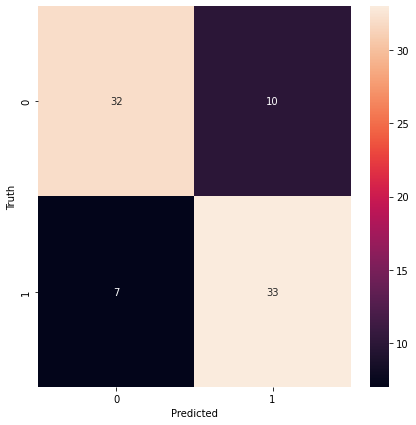

In [52]:
y_predicated = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicated)
plt.figure(figsize = (7,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
xp = model.predict(X_train)

In [54]:
Y_pre = np.append(xp, y_predicated)
model_resul = pd.DataFrame(Y_pre)


Text(0, 0.5, 'cases_number')

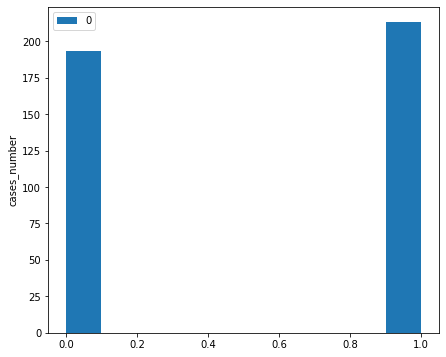

In [55]:
model_resul.plot.hist(figsize=(7,6))

plt.ylabel('cases_number')

# Model using LTSM analysis

In [70]:

import pandas_datareader as reader
import datetime as datetime
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split

In [64]:
# Read ata again in case we changed it
df=pd.read_csv(dataset)

In [65]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [67]:
x_train, x_test, y_train, y_test = train_test_split(df[["age","anaemia","creatinine_phosphokinase","diabetes","ejection_fraction","high_blood_pressure","platelets",
                                                        "serum_creatinine", "serum_sodium","sex", "smoking", 	"time" 	]], df["DEATH_EVENT"], test_size=0.15, random_state=42)

In [68]:
print(x_train)
print(x_test)

        age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
197  65.000        0                       167         0                 30   
210  70.000        0                       212         1                 17   
288  65.000        0                       892         1                 35   
219  55.000        0                       582         1                 35   
178  63.000        1                       122         1                 60   
..      ...      ...                       ...       ...                ...   
188  60.667        1                       151         1                 40   
71   58.000        0                       582         1                 35   
106  55.000        0                       748         0                 45   
270  44.000        0                       582         1                 30   
102  80.000        0                       898         0                 25   

     high_blood_pressure  platelets  serum_creatini

In [71]:
print(y_train)
print(y_test)

197    0
210    0
288    0
219    0
178    0
      ..
188    0
71     0
106    0
270    0
102    0
Name: DEATH_EVENT, Length: 254, dtype: int64
281    0
265    0
164    1
9      1
77     0
278    0
93     1
109    0
5      1
173    0
97     0
195    1
184    1
154    0
57     0
60     1
147    0
108    0
63     1
140    1
155    0
104    0
247    0
46     1
42     1
275    0
280    0
116    0
213    1
236    0
17     1
239    0
33     0
24     1
45     1
7      1
113    1
194    1
111    0
92     0
75     1
82     1
118    0
76     0
129    0
Name: DEATH_EVENT, dtype: int64


In [72]:
#Model Architecture
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, x_train.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
#An optimizer is used to help improve upon the Loss function, while the Loss function gives us information on 
#how the model did on training.
lstm.compile(loss="mean_squared_error", optimizer="adam")

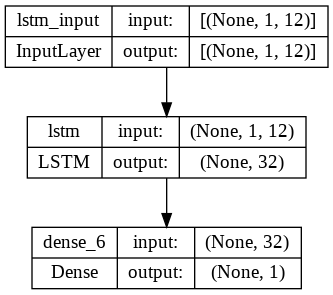

In [73]:
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [74]:
xtrain = np.array(x_train)
xtrain = xtrain.reshape(xtrain.shape[0], 1, xtrain.shape[1]) #Reshape data to align with parameter
#Here we start training the model by setting it to iterate over the entire dataset a 100 times, with a batch size of 8
history = lstm.fit(xtrain, y_train, epochs = 100, batch_size = 8, verbose = 1, shuffle = False)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 16431.4434
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 1032.0273
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 434.2233
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 338.4256
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 239.1217
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 191.5711
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 154.5174
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 126.2664
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 94.3454
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 57.5107
Epoch 11/100
32/32 [==============================] - 0s 3ms/step - loss: 29.9915
Epoch 12/100
32/32 [==============================] - 0s 3ms/step - loss: 16.3180
Epoch 13/100
3

In [75]:
#Convert to a np array so that we can use it in our LSTM Model.
xtest = np.array(x_test)
#Now we need to reshape our data because our dataset is 2D but the LSTM Model expects a 3D shape
xtest = xtest.reshape(xtest.shape[0], 1, xtest.shape[1]) #Reshape data to align with parameter
#Next we need to get the models death event
model_pred = lstm.predict(xtest)
model_pred;

2/2 [==============================] - 0s 10ms/step


In [81]:
### correlation with age

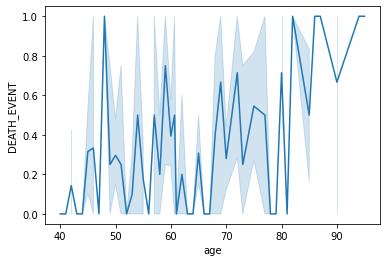

In [82]:
sns.lineplot(data=df, x="age", y="DEATH_EVENT")

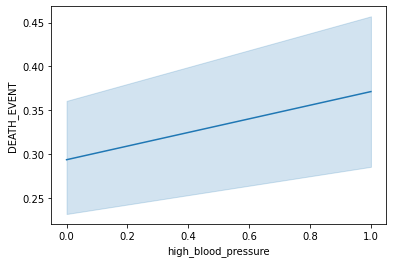

In [78]:
sns.lineplot(data=df, x="high_blood_pressure", y="DEATH_EVENT")

## correlation with time

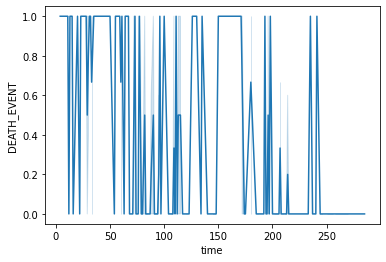

In [83]:
sns.lineplot(data=df, x="time", y="DEATH_EVENT")

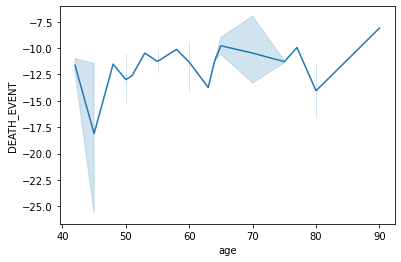

In [84]:
x_test["DEATH_EVENT"] = model_pred
sns.lineplot(data=x_test, x="age", y="DEATH_EVENT")

After analysis, we have noticed that although the LSTM model follows the general trends of the graph, it sometimes over/underestimates the death event greatly.



GOAL

Our goal was to analyze death history with two different types of models. In this next part we will be using more layers of an LSTM model than our previous solution. This model will have an additional Dropout layer to further help to prevent overfitting. On our first model, we noticed that our model ws overfitting the data that we had even after training the model multiple times. Using a different and more extensive use of data. We will create and load the same data wuth a different model


In [86]:
#First we load in the data
new_data = pd.read_csv(dataset)
new_data.head()
#Next we prepare the data
scale = MinMaxScaler(feature_range = (0, 1))
#Next we reshape the data to be able to fit the liner regression model
reshaped_data = new_data['DEATH_EVENT'].values.reshape(-1, 1)
scaling_data = scale.fit_transform(reshaped_data)
scaling_data

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],

In [87]:
#Create empty arrays to store data to train
xtrain = []
ytrain = []
length_of_scale = len(scaling_data)
#We want to start prediction from 50 days to the end of the length of the scaled dataset
#We are going to fill the data by starting at the 50th index and iterate until the end of the scaled data
for values in range(50, length_of_scale):
  #Append values to the train dataset array, we are trying to set the model to train the first 50 values and append that to xtrain
  #Then from the 51st value that we already know we are going to set that to ytrain so that our model will be ble to predict the next values 
  xtrain.append(scaling_data[values - 50 : values, 0])
  ytrain.append(scaling_data[values, 0])

In [88]:
#Next we start convert the data to an array
xtrain = np.array(xtrain)
#Now we need to reshape our data because our dataset is 2D but the LSTM Model expects a 3D shape just like our previous model
xtrain = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))
ytrain = np.array(ytrain) #Converting the data to an array
#To start building the Model, we will need to couple of things.
#We will need to build layers. We are going to create about 7 layers for our model
second_model = Sequential()
second_model.add(LSTM(40, input_shape = (xtrain.shape[1], 1), return_sequences = True))
#The Dropout layer is used to randomly sets input units to 0 with a frequency of rate
#at each step during training time. I am adding this so as to helps prevent overfitting.
second_model.add(Dropout(0.4))
#Adding another lader to the model to aid in prediction
second_model.add(LSTM(40, return_sequences = True))
#The Dropout layer is used to randomly sets input units to 0 with a frequency of rate
#at each step during training time. I am adding this so as to helps prevent overfitting.
second_model.add(Dropout(0.4))
second_model.add(LSTM(40))
second_model.add(Dropout(0.4))
#This will serve as the neuron that will predict the closing price value from our data after training
second_model.add(Dense(1))
#An optimizer is used to help imporove upon the Loss function, while the Loss function gives us information on 
#how the model did on training.
second_model.compile(loss="mean_squared_error", optimizer="adam")
second_model.fit(xtrain, ytrain, epochs = 30, batch_size = 25)

Epoch 1/30
10/10 [==============================] - 6s 71ms/step - loss: 0.1827
Epoch 2/30
10/10 [==============================] - 1s 69ms/step - loss: 0.1489
Epoch 3/30
10/10 [==============================] - 1s 110ms/step - loss: 0.1535
Epoch 4/30
10/10 [==============================] - 1s 86ms/step - loss: 0.1463
Epoch 5/30
10/10 [==============================] - 1s 75ms/step - loss: 0.1490
Epoch 6/30
10/10 [==============================] - 1s 108ms/step - loss: 0.1506
Epoch 7/30
10/10 [==============================] - 1s 126ms/step - loss: 0.1479
Epoch 8/30
10/10 [==============================] - 1s 123ms/step - loss: 0.1493
Epoch 9/30
10/10 [==============================] - 1s 101ms/step - loss: 0.1468
Epoch 10/30
10/10 [==============================] - 1s 115ms/step - loss: 0.1467
Epoch 11/30
10/10 [==============================] - 1s 104ms/step - loss: 0.1490
Epoch 12/30
10/10 [==============================] - 1s 71ms/step - loss: 0.1496
Epoch 13/30
10/10 [===========

In [89]:
#Get test data
test = pd.read_csv(dataset) #Read csv with pandas, parse dates and set date as index column
test.head() #print out 
right_death_values = test['DEATH_EVENT'].values
#all_data = pd.read_csv("QQQ", index_col = "Date", parse_dates = True) #Read csv with pandas, parse dates and set date as index column
all_data = pd.concat((new_data['DEATH_EVENT'], test['DEATH_EVENT']))
all_data.head() #print out 
all_data_length = len(all_data) #get the length so we know where to start
test_length = len(test) #get the length so we know where to start and end
data_sum = all_data_length - test_length #we know the exact length excess of both data
prediction_model = all_data[data_sum - 50 : ].values #we want to go from 1259 - 505 - the number of days to predict which is 50

#Next we need to scale it like before and all we are doing here is repeating the process above
prediction_model = prediction_model.reshape(-1, 1) #We need to reshape this model to column without changing its data

prediction_model_length = len(prediction_model)
prediction_model = scale.transform(prediction_model) #We need to transform because initially we scaled it up before. So now we have to turn it back to data we can use
#create new testing variable array
new_tester = []
#Now we can make predictions with all the data we have, which is what we did earlier, we are just repeating the step
for values in range(50, prediction_model_length):
  #Populate the array
  new_tester.append(prediction_model[values - 50 : values, 0])

In [92]:
#After populating the array, next we 
new_tester = np.array(new_tester)
#Have to reshape new tester to fit the size of a 3D shape
new_tester = np.reshape(new_tester, (new_tester.shape[0], new_tester.shape[1], 1))

#After gathering all the info now we can predict the stock prices
potential_death = second_model.predict(new_tester)
#potential_prices = scaler.inverse_transform(potential_prices)
revert_deaths = scale.inverse_transform(potential_death)
revert_deaths

10/10 [==============================] - 0s 20ms/step


array([[0.09604837],
       [0.1032133 ],
       [0.11848868],
       [0.14006075],
       [0.16578308],
       [0.1939824 ],
       [0.22360608],
       [0.25409612],
       [0.28519577],
       [0.3167798 ],
       [0.34873897],
       [0.3809176 ],
       [0.4130929 ],
       [0.44498205],
       [0.4762917 ],
       [0.4926864 ],
       [0.50736344],
       [0.5230575 ],
       [0.5401958 ],
       [0.55826056],
       [0.5766199 ],
       [0.58053994],
       [0.58346075],
       [0.588058  ],
       [0.5809524 ],
       [0.5753092 ],
       [0.57343906],
       [0.57536584],
       [0.58034706],
       [0.5875235 ],
       [0.596169  ],
       [0.6057466 ],
       [0.61588466],
       [0.6263308 ],
       [0.6226599 ],
       [0.6187508 ],
       [0.6173755 ],
       [0.6190003 ],
       [0.62321526],
       [0.61528623],
       [0.60843843],
       [0.605044  ],
       [0.60527974],
       [0.6085427 ],
       [0.600096  ],
       [0.59297746],
       [0.5895206 ],
       [0.589

Text(0, 0.5, 'Probability of Dieing')

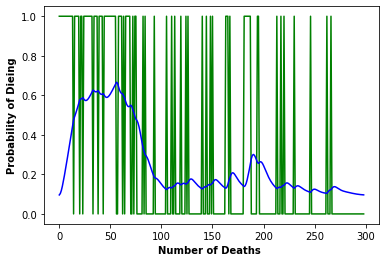

In [93]:
#Plot predictions
plt.plot(right_death_values, color = 'green')
plt.plot(revert_deaths, color = 'blue')
plt.xlabel("Number of Deaths ", fontweight = "bold")
plt.ylabel("Probability of Dieing", fontweight = "bold")

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
! pwd 

/content


In [104]:
%%shell
jupyter nbconvert --to html ///content/drive/*.ipynb

[NbConvertApp] WARNING | pattern '///content/drive/*.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec

CalledProcessError: ignored